In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [29]:
import cv2
import numpy as np
import os
import csv

In [30]:
trainingDataset = []
img_size = 100
path = "/content/drive/My Drive/CV_Project_2/Train2"


In [31]:
classNumber = 0
trainingDataset.clear()

for folder in (os.listdir(path)):
  print(classNumber)
  print("Folder Name:",folder)
  # folder = with_mask ,without_mask
  fp = os.path.join(path,folder)
  # joining folder like /content/Face_Mask/Train/with_mask
  for eachImage in os.listdir(fp):
    imagePath = os.path.join(fp,eachImage)
    img = (cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE))/255
    resize=cv2.resize(img,(img_size,img_size))
    trainingDataset.append([resize,classNumber])
  classNumber = classNumber + 1

0
Folder Name: burger
1
Folder Name: butter_naan
2
Folder Name: chai
3
Folder Name: chapati
4
Folder Name: pizza
5
Folder Name: samosa
6
Folder Name: dhokla
7
Folder Name: jalebi
8
Folder Name: kulfi
9
Folder Name: paani_puri


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import time

In [33]:
X = []
Y = []
img_size = 100
np.random.shuffle(trainingDataset)
for features, label in trainingDataset:
    X.append(features)
    Y.append(label)
print(Y) 

[8, 1, 2, 3, 1, 6, 2, 2, 6, 5, 0, 2, 1, 2, 4, 1, 2, 0, 8, 6, 7, 5, 3, 6, 4, 2, 7, 2, 7, 6, 8, 1, 2, 0, 0, 5, 4, 7, 8, 5, 2, 3, 6, 3, 9, 6, 8, 2, 2, 4, 5, 4, 1, 4, 4, 4, 8, 1, 7, 3, 1, 7, 1, 0, 4, 8, 3, 8, 8, 3, 0, 2, 1, 2, 7, 5, 1, 3, 0, 8, 7, 3, 2, 3, 1, 5, 7, 1, 7, 6, 7, 1, 2, 5, 1, 4, 3, 2, 6, 4, 3, 2, 9, 6, 8, 0, 4, 2, 5, 4, 5, 1, 1, 8, 3, 8, 5, 3, 2, 4, 7, 5, 6, 4, 5, 9, 0, 7, 0, 7, 8, 7, 4, 4, 2, 1, 7, 6, 5, 6, 4, 7, 4, 7, 1, 1, 3, 4, 5, 6, 1, 7, 7, 1, 2, 2, 7, 4, 6, 6, 5, 1, 3, 8, 8, 4, 2, 3, 9, 8, 2, 1, 3, 0, 6, 2, 0, 4, 3, 8, 4, 7, 3, 7, 2, 2, 4, 4, 4, 5, 7, 5, 6, 8, 1, 2, 8, 3, 7, 9, 8, 3, 1, 2, 6, 1, 7, 3, 6, 8, 5, 4, 6, 7, 2, 4, 1, 4, 5, 3, 7, 2, 9, 3, 0, 7, 1, 7, 1, 7, 0, 3, 8, 3, 3, 3, 3, 4, 7, 6, 0, 6, 8, 2, 3, 7, 4, 8, 0, 1, 1, 9, 4, 5, 7, 8, 7, 5, 1, 5, 8, 7, 0, 9, 2, 3, 3, 3, 3, 4, 1, 1, 3, 5, 0, 5, 4, 7, 8, 7, 7, 7, 8, 1, 1, 4, 9, 7, 7, 0, 7, 4, 3, 3, 0, 4, 2, 6, 4, 1, 8, 5, 0, 7, 8, 3, 3, 0, 3, 0, 2, 5, 6, 2, 3, 6, 1, 8, 6, 4, 3, 9, 0, 3, 6, 0, 6, 4, 8, 4, 5, 5, 1, 

In [34]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
Y_binary = to_categorical(Y)
print(X)
print(Y_binary)

[[[[0.36542745]
   [0.50941176]
   [0.53411765]
   ...
   [0.40603913]
   [0.40818824]
   [0.40784314]]

  [[0.47962353]
   [0.51515294]
   [0.53827451]
   ...
   [0.4057256 ]
   [0.41280001]
   [0.41298825]]

  [[0.51184314]
   [0.5227451 ]
   [0.54392157]
   ...
   [0.41411755]
   [0.4186667 ]
   [0.42352941]]

  ...

  [[0.2627451 ]
   [0.2627451 ]
   [0.2627451 ]
   ...
   [0.27254902]
   [0.2745098 ]
   [0.2745098 ]]

  [[0.2627451 ]
   [0.2627451 ]
   [0.2627451 ]
   ...
   [0.27058824]
   [0.2745098 ]
   [0.2745098 ]]

  [[0.2627451 ]
   [0.2627451 ]
   [0.2627451 ]
   ...
   [0.27058824]
   [0.2745098 ]
   [0.2745098 ]]]


 [[[0.3866353 ]
   [0.40737257]
   [0.38454899]
   ...
   [0.26023705]
   [0.2762975 ]
   [0.21794539]]

  [[0.37551367]
   [0.35843132]
   [0.370902  ]
   ...
   [0.18337315]
   [0.20614962]
   [0.2556859 ]]

  [[0.36400001]
   [0.41741177]
   [0.38235293]
   ...
   [0.23411746]
   [0.21999943]
   [0.20290192]]

  ...

  [[0.21858823]
   [0.19082354]
   [0.1

In [35]:
model = Sequential()

model.add(Conv2D(40, (3, 3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(60, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(80, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('relu'))
 
model.add(Dense(10))
model.add(Activation('softmax'))



In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [37]:
history = model.fit(X, Y_binary,
          batch_size = 32,
          epochs=20, validation_split = 0.1)
 
model.save("/content/drive/My Drive/CV_Project_2/Models/{NAME}.model")

Epoch 1/20
82/82 [==============================] - 4s 36ms/step - loss: 2.2862 - accuracy: 0.1288 - val_loss: 2.2620 - val_accuracy: 0.1787
Epoch 2/20
82/82 [==============================] - 2s 30ms/step - loss: 2.2202 - accuracy: 0.1846 - val_loss: 2.2289 - val_accuracy: 0.1821
Epoch 3/20
82/82 [==============================] - 2s 30ms/step - loss: 2.1078 - accuracy: 0.2458 - val_loss: 1.9879 - val_accuracy: 0.2852
Epoch 4/20
82/82 [==============================] - 2s 30ms/step - loss: 1.9540 - accuracy: 0.3085 - val_loss: 1.9114 - val_accuracy: 0.2887
Epoch 5/20
82/82 [==============================] - 3s 31ms/step - loss: 1.8626 - accuracy: 0.3330 - val_loss: 1.9588 - val_accuracy: 0.2955
Epoch 6/20
82/82 [==============================] - 3s 31ms/step - loss: 1.7805 - accuracy: 0.3628 - val_loss: 2.1333 - val_accuracy: 0.2474
Epoch 7/20
82/82 [==============================] - 3s 31ms/step - loss: 1.6592 - accuracy: 0.4190 - val_loss: 1.8160 - val_accuracy: 0.3643
Epoch 8/20
82

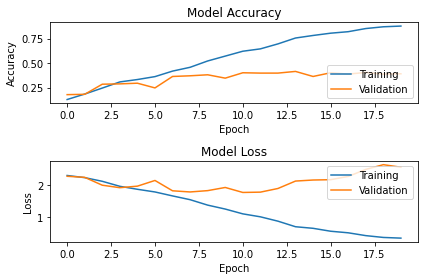

In [38]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [39]:
def prepare(filepath):
    img_size = 100 
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)/255  
    img_resize = cv2.resize(img, (img_size, img_size))  
    return img_resize.reshape(-1, img_size, img_size, 1)

In [45]:
prediction = model.predict(prepare("/content/drive/My Drive/CV_Project_2/Test/pizza.jpg"))
print((prediction))

# CATEGORIES = ["ButterNaan", "Burger","Chapati","Chai","Samosa","Pizza"]
CATEGORIES = ["Burger", "ButterNaan","Chai","Chapati","Pizza","Samosa","Dhokla","Jalebi","Kulfi","Paani Puri"]

pred_class = CATEGORIES[np.argmax(prediction)]
print(pred_class)

[[5.9522573e-02 1.0950688e-02 1.6966973e-03 1.4958408e-02 5.0745070e-01
  3.4796624e-03 2.9642475e-01 1.0494208e-01 2.7663712e-04 2.9772840e-04]]
Pizza
